In [1]:
!pip install koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [4]:
reviews = pd.read_csv("gdrive/My Drive/data/olist_order_reviews_dataset.csv")
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [5]:
reviews = reviews.rename(columns = {'order_id':'주문ID','review_id':'댓글식별번호','review_score':'댓글점수','review_comment_title':'댓글제목','review_comment_message':'댓글내용',
                                'review_creation_date':'댓글작성시간','review_answer_timestamp':'댓글답변시간'
                               })

In [6]:
reviews.head()

,댓글식별번호,주문ID,댓글점수,댓글제목,댓글내용,댓글작성시간,댓글답변시간
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
reviews_O = reviews.loc[(reviews["댓글점수"] > 0),["댓글점수",'댓글내용']]
reviews_O 

,댓글점수,댓글내용
0,4,NaN
1,5,NaN
2,5,NaN
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
...,...,...
99219,5,NaN
99220,5,NaN
99221,5,"Excelente mochila, entrega super rápida. Super..."
99222,4,NaN


In [8]:
# reviews_O.to_excel('reviews_O.xlsx', index=False)

In [9]:
review_Ko= pd.read_csv("gdrive/My Drive/data/review_Ko.csv")
review_Ko.tail(4)

,Unnamed: 0,댓글점수,댓글내용
99220,99220,5,NaN
99221,99221,5,"우수한 배낭, 초고속 배송. 나는이 가게를 강력히 추천합니다!"
99222,99222,4,NaN
99223,99223,1,상품이 도착했는데 이미 반품을 해야하는데 불량이라 화물이 안들어가네요


In [10]:
review_Ko = review_Ko.rename(columns = {' 댓글내용':'댓글내용'})

In [11]:
review_Ko.columns

Index(['Unnamed: 0', '댓글점수', '댓글내용'], dtype='object')

In [12]:
# review_Ko.to_csv("review_Ko.csv")

In [13]:
review_Ko["댓글내용"].isnull().sum()

58274

In [14]:
review_Ko = review_Ko.dropna(axis=0)

In [15]:
review_Ko.head()

,Unnamed: 0,댓글점수,댓글내용
3,3,5,정해진 시간 전에 잘 받았습니다.
4,4,5,축하합니다 Lannister 매장 저는 안전하고 실용적인 온라인 쇼핑을 좋아했습니...
9,9,4,효율적인 장치. 웹사이트에 기기 브랜드가 3disinfector로 인쇄되어 있고 ...
12,12,4,다만 속도가 좀 느려요... 가격대비 좋습니다.
15,15,5,"신뢰할 수있는 판매자, ok 제품 및 정시 배송."


In [16]:
review_Ko.shape

(40950, 3)

# 전처리 후 파생변수 만들기

In [17]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 45.2 MB/s eta 0:00:00


In [18]:
# 정규 표현식으로 전처리
import re

def preprocessing(text):
    text = re.sub(r"[^가-힣0-9\s]", " ", text) #한글이랑 숫자, 공백만 남기기
    text = re.sub(r"\s+", " ", text) #중복 공백 없애기
    text = text.strip() #앞뒤 공백 없애기
    return text

In [19]:
from tqdm import tqdm
tqdm.pandas()

review_Ko['댓글내용'] = review_Ko['댓글내용'].progress_map(preprocessing)

100%|██████████| 40950/40950 [00:00<00:00, 48245.61it/s]


In [20]:
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = [ '합니다', '하는', '할', '하고', '한다', 
             '그리고', '입니다', '그', '등', '이런', '및','제', '더','수']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [21]:
review_Ko["댓글내용"] = review_Ko["댓글내용"].map(remove_stopwords)

In [22]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 4.08 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-01-28 12:57:35--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470, 2406:da00:ff00::22cd:e0db, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bb

In [23]:
from konlpy.tag import Mecab

In [24]:
mecab = Mecab()

In [25]:
# 명사만 남게 전처리
review_Ko["명사"] = review_Ko['댓글내용'].map(mecab.nouns).astype(str).progress_map(preprocessing)

100%|██████████| 40950/40950 [00:00<00:00, 114613.15it/s]


# 리뷰점수 5점 데이터만 가져와서 워드클라우드

In [26]:
reviews_ko = review_Ko.loc[(review_Ko["댓글점수"] == 5),['댓글내용','명사']]
reviews_ko

,댓글내용,명사
3,정해진 시간 전에 잘 받았습니다,시간 전
4,축하합니다 매장 저는 안전하고 실용적인 온라인 쇼핑을 좋아했습니다 모두 행복한 부활...,축하 저 실용 온라인 쇼핑 행복 부활절 축하
15,신뢰할 수있는 판매자 제품 정시 배송,신뢰 수 판매자 제품 정시 배송
22,스토어 노트 10,스토어 노트
24,나에게 주어진 관심에 감사드립니다,나 관심 감사
...,...,...
99191,정말 즐거웠습니다 같은 제품 두번째 구매입니다,제품 번 구매
99196,우리는 제품에 매우 만족했고 우리의 요구를 매우 쉽게 충족했습니다 나는 추천한다,우리 제품 만족 우리 요구 충족 나 추천
99202,오리지널 제품 빠른 배송 시간 매우 만족합니다,오리지널 제품 배송 시간 만족
99208,기간 내에 배송됩니다 제품이 완벽한 상태로 도착했습니다 매우 만족합니다,기간 내 배송 제품 완벽 상태 도착 만족


In [27]:
reviews_ko["댓글내용"].str.split()

3                                  [정해진, 시간, 전에, 잘, 받았습니다]
4        [축하합니다, 매장, 저는, 안전하고, 실용적인, 온라인, 쇼핑을, 좋아했습니다, ...
15                             [신뢰할, 수있는, 판매자, 제품, 정시, 배송]
22                                           [스토어, 노트, 10]
24                                 [나에게, 주어진, 관심에, 감사드립니다]
                               ...                        
99191                     [정말, 즐거웠습니다, 같은, 제품, 두번째, 구매입니다]
99196    [우리는, 제품에, 매우, 만족했고, 우리의, 요구를, 매우, 쉽게, 충족했습니다,...
99202                    [오리지널, 제품, 빠른, 배송, 시간, 매우, 만족합니다]
99208    [기간, 내에, 배송됩니다, 제품이, 완벽한, 상태로, 도착했습니다, 매우, 만족합니다]
99221             [우수한, 배낭, 초고속, 배송, 나는이, 가게를, 강력히, 추천합니다]
Name: 댓글내용, Length: 20535, dtype: object

In [28]:
reviews_ko["댓글내용"].str.split(expand = True)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
3,정해진,시간,전에,잘,받았습니다,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,축하합니다,매장,저는,안전하고,실용적인,온라인,쇼핑을,좋아했습니다,모두,행복한,...,None,None,None,None,None,None,None,None,None,None
15,신뢰할,수있는,판매자,제품,정시,배송,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
22,스토어,노트,10,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
24,나에게,주어진,관심에,감사드립니다,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99191,정말,즐거웠습니다,같은,제품,두번째,구매입니다,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
99196,우리는,제품에,매우,만족했고,우리의,요구를,매우,쉽게,충족했습니다,나는,...,None,None,None,None,None,None,None,None,None,None
99202,오리지널,제품,빠른,배송,시간,매우,만족합니다,None,None,None,...,None,None,None,None,None,None,None,None,None,None
99208,기간,내에,배송됩니다,제품이,완벽한,상태로,도착했습니다,매우,만족합니다,None,...,None,None,None,None,None,None,None,None,None,None


In [29]:
reviews_ko["댓글내용"] = reviews_ko["댓글내용"].astype('string')
reviews_ko["명사"] = reviews_ko["명사"].astype('string')
reviews_ko

,댓글내용,명사
3,정해진 시간 전에 잘 받았습니다,시간 전
4,축하합니다 매장 저는 안전하고 실용적인 온라인 쇼핑을 좋아했습니다 모두 행복한 부활...,축하 저 실용 온라인 쇼핑 행복 부활절 축하
15,신뢰할 수있는 판매자 제품 정시 배송,신뢰 수 판매자 제품 정시 배송
22,스토어 노트 10,스토어 노트
24,나에게 주어진 관심에 감사드립니다,나 관심 감사
...,...,...
99191,정말 즐거웠습니다 같은 제품 두번째 구매입니다,제품 번 구매
99196,우리는 제품에 매우 만족했고 우리의 요구를 매우 쉽게 충족했습니다 나는 추천한다,우리 제품 만족 우리 요구 충족 나 추천
99202,오리지널 제품 빠른 배송 시간 매우 만족합니다,오리지널 제품 배송 시간 만족
99208,기간 내에 배송됩니다 제품이 완벽한 상태로 도착했습니다 매우 만족합니다,기간 내 배송 제품 완벽 상태 도착 만족


In [30]:
reviews_ko["댓글내용"].str.contains("빠른").sum()

1078

In [31]:
good_s = reviews_ko[reviews_ko["댓글내용"].str.contains("배송")]
good_s

,댓글내용,명사
15,신뢰할 수있는 판매자 제품 정시 배송,신뢰 수 판매자 제품 정시 배송
27,구매가 수월하게 이루어졌습니다 배송은 주어진 마감일보다 훨씬 일찍 이루어졌습니다 제...,구매 배송 마감 일 제품 사용 시작 지금 문제 사용
61,모든 것이 계약대로 진행되었고 마감일 전에 배송이 이루어졌습니다 만족합니다,것 계약 진행 마감 일 전 배송 만족
69,요청한 대로 매우 신속하게 배송된 제품입니다 축하합니다,요청 대로 신속 배송 제품 축하
88,만족스러운 시간 내에 구매 배송으로 약속한 내용을 이행했습니다,만족 시간 내 구매 배송 약속 내용 이행
...,...,...
99164,아주 좋아 광고 된 제품 정시 배송,광고 제품 정시 배송
99165,좋은 오후입니다 구입한 것이 마음에 들었습니다 재질도 좋고 배송도 마감일 전에 잘 ...,오후 구입 것 마음 재질 배송 마감 일 전 도착 감사
99202,오리지널 제품 빠른 배송 시간 매우 만족합니다,오리지널 제품 배송 시간 만족
99208,기간 내에 배송됩니다 제품이 완벽한 상태로 도착했습니다 매우 만족합니다,기간 내 배송 제품 완벽 상태 도착 만족


In [32]:
reviews_ko["댓글내용"].tail()

99191                       정말 즐거웠습니다 같은 제품 두번째 구매입니다
99196    우리는 제품에 매우 만족했고 우리의 요구를 매우 쉽게 충족했습니다 나는 추천한다
99202                       오리지널 제품 빠른 배송 시간 매우 만족합니다
99208         기간 내에 배송됩니다 제품이 완벽한 상태로 도착했습니다 매우 만족합니다
99221                 우수한 배낭 초고속 배송 나는이 가게를 강력히 추천합니다
Name: 댓글내용, dtype: string

In [33]:
reviews_ko.shape

(20535, 2)

In [34]:
reviews_ko

,댓글내용,명사
3,정해진 시간 전에 잘 받았습니다,시간 전
4,축하합니다 매장 저는 안전하고 실용적인 온라인 쇼핑을 좋아했습니다 모두 행복한 부활...,축하 저 실용 온라인 쇼핑 행복 부활절 축하
15,신뢰할 수있는 판매자 제품 정시 배송,신뢰 수 판매자 제품 정시 배송
22,스토어 노트 10,스토어 노트
24,나에게 주어진 관심에 감사드립니다,나 관심 감사
...,...,...
99191,정말 즐거웠습니다 같은 제품 두번째 구매입니다,제품 번 구매
99196,우리는 제품에 매우 만족했고 우리의 요구를 매우 쉽게 충족했습니다 나는 추천한다,우리 제품 만족 우리 요구 충족 나 추천
99202,오리지널 제품 빠른 배송 시간 매우 만족합니다,오리지널 제품 배송 시간 만족
99208,기간 내에 배송됩니다 제품이 완벽한 상태로 도착했습니다 매우 만족합니다,기간 내 배송 제품 완벽 상태 도착 만족


In [35]:
!apt-get install fonts-nanum -qq  > /dev/null
!fc-cache -fv

import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [36]:
from wordcloud import WordCloud

def display_word_cloud(data, width=1200, height=500):
    word_draw = WordCloud(
        # r(raw) \n 이 있을 때 경로에서 줄바꿈을 하는 문제 등이 발생하기 때문에 그 텍스트 그대로 읽어오게 합니다.
        font_path=r"/Library/Fonts/NanumBarunGothic.ttf",
        width=width, height=height,
        background_color="white",
        stopwords=['나는','추천한다','그것은','감사합니다','축하합니다','이','추천합니다','일','것','전','나','이것','바라 테','그것','노트','때문'],
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

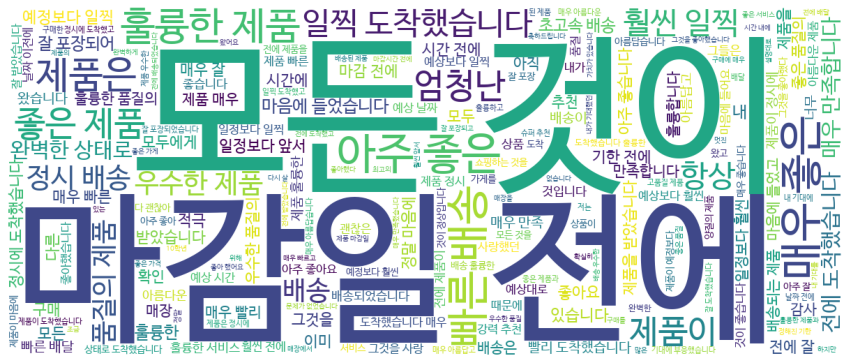

In [37]:
display_word_cloud(" ".join(reviews_ko["댓글내용"]))

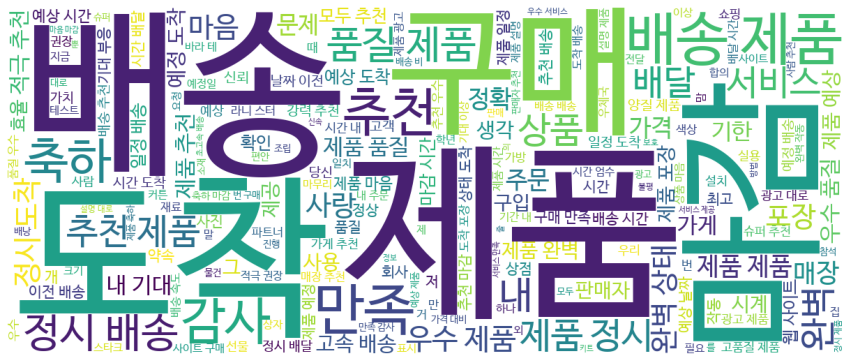

In [38]:
display_word_cloud(" ".join(reviews_ko["명사"]))

# 배송 관련 데이터 감정 분석

In [39]:
reviews_ko.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20535 entries, 3 to 99221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   댓글내용    20535 non-null  string
 1   명사      20535 non-null  string
dtypes: string(2)
memory usage: 481.3 KB


In [40]:
review_Ko.loc[review_Ko["명사"].str.contains("배송|배달|도착|마감|시간|기간"), "분류"] = "배송"
review_Ko.loc[~review_Ko["명사"].str.contains("배송|배달|도착|마감|시간|기간"), "분류"] = "기타"

In [41]:
review_Ko["분류"].value_counts()

기타    23290
배송    17660
Name: 분류, dtype: int64

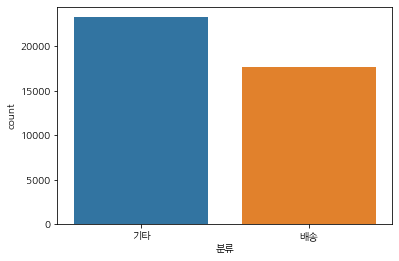

In [42]:
sns.countplot(data=review_Ko, x="분류",order = review_Ko["분류"].value_counts().index);

In [43]:
content = " ".join(review_Ko.loc[review_Ko["분류"] == "배송", "댓글내용"].tolist())
content[:100]

'정해진 시간 전에 잘 받았습니다 효율적인 장치 웹사이트에 기기 브랜드가 3 로 인쇄되어 있고 도착하면 다른 이름이 표시됩니다 동일한 기기이므로 올바른 브랜드로 업데이트하세요 신뢰할'

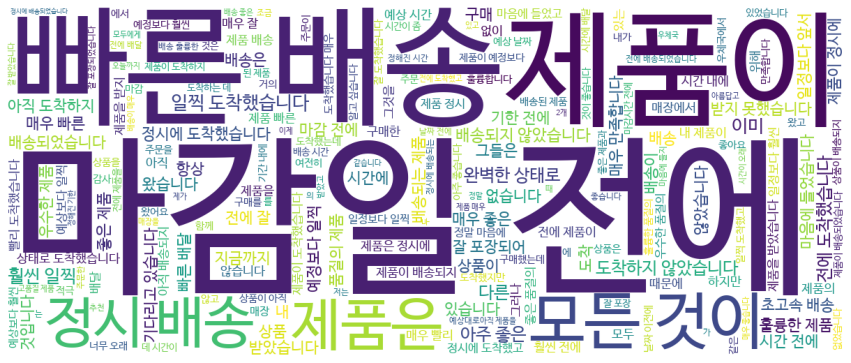

In [44]:
display_word_cloud(content)

In [45]:
!pip --version

pip 22.0.4 from /usr/local/lib/python3.8/dist-packages/pip (python 3.8)


In [46]:
!pip --version

pip 22.0.4 from /usr/local/lib/python3.8/dist-packages/pip (python 3.8)


In [47]:
!git clone https://github.com/kakaobrain/pororo.git

Cloning into 'pororo'...
remote: Enumerating objects: 2119, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 2119 (delta 11), reused 22 (delta 8), pack-reused 2090
Receiving objects: 100% (2119/2119), 13.09 MiB | 17.76 MiB/s, done.
Resolving deltas: 100% (1448/1448), done.


In [48]:
ls

images/                                    LICENSE
install_mecab-ko_on_colab190912.sh         pororo/
install_mecab-ko_on_colab_light_220429.sh  README.md


In [49]:
cd pororo

/content/Mecab-ko-for-Google-Colab/pororo


In [ ]:
!pip install -e .

In [51]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
from pororo import Pororo

In [53]:
ocr = Pororo(task='ocr')

In [54]:
# 쇼핑 리뷰 데이터셋 훈련 모델 돌리기
sa_shop = Pororo(task='sentiment', model='brainbert.base.ko.shopping', lang='ko')

In [55]:
reviews_N = review_Ko.loc[(review_Ko["분류"] == "배송"),['분류','댓글내용','댓글점수']]
reviews_N

,분류,댓글내용,댓글점수
3,배송,정해진 시간 전에 잘 받았습니다,5
9,배송,효율적인 장치 웹사이트에 기기 브랜드가 3 로 인쇄되어 있고 도착하면 다른 이름이 ...,4
15,배송,신뢰할 수있는 판매자 제품 정시 배송,5
27,배송,구매가 수월하게 이루어졌습니다 배송은 주어진 마감일보다 훨씬 일찍 이루어졌습니다 제...,5
32,배송,나는 항상 온라인으로 구매하고 합의된 기한 전에 배송이 이루어지며 이것이 최대 기한...,1
...,...,...,...
99202,배송,오리지널 제품 빠른 배송 시간 매우 만족합니다,5
99203,배송,02 19 02 19 배송으로 택배사 홈페이지에 올려놓은 배송에 문제가 있었는데 아...,2
99208,배송,기간 내에 배송됩니다 제품이 완벽한 상태로 도착했습니다 매우 만족합니다,5
99221,배송,우수한 배낭 초고속 배송 나는이 가게를 강력히 추천합니다,5


In [56]:
reviews_N.tail()

,분류,댓글내용,댓글점수
99202,배송,오리지널 제품 빠른 배송 시간 매우 만족합니다,5
99203,배송,02 19 02 19 배송으로 택배사 홈페이지에 올려놓은 배송에 문제가 있었는데 아...,2
99208,배송,기간 내에 배송됩니다 제품이 완벽한 상태로 도착했습니다 매우 만족합니다,5
99221,배송,우수한 배낭 초고속 배송 나는이 가게를 강력히 추천합니다,5
99223,배송,상품이 도착했는데 이미 반품을 해야하는데 불량이라 화물이 안들어가네요,1


In [57]:
# 중복데이터 제거
reviews_N = reviews_N.drop_duplicates()
reviews_N

,분류,댓글내용,댓글점수
3,배송,정해진 시간 전에 잘 받았습니다,5
9,배송,효율적인 장치 웹사이트에 기기 브랜드가 3 로 인쇄되어 있고 도착하면 다른 이름이 ...,4
15,배송,신뢰할 수있는 판매자 제품 정시 배송,5
27,배송,구매가 수월하게 이루어졌습니다 배송은 주어진 마감일보다 훨씬 일찍 이루어졌습니다 제...,5
32,배송,나는 항상 온라인으로 구매하고 합의된 기한 전에 배송이 이루어지며 이것이 최대 기한...,1
...,...,...,...
99202,배송,오리지널 제품 빠른 배송 시간 매우 만족합니다,5
99203,배송,02 19 02 19 배송으로 택배사 홈페이지에 올려놓은 배송에 문제가 있었는데 아...,2
99208,배송,기간 내에 배송됩니다 제품이 완벽한 상태로 도착했습니다 매우 만족합니다,5
99221,배송,우수한 배낭 초고속 배송 나는이 가게를 강력히 추천합니다,5


In [58]:
reviews_N.shape

(16134, 3)

In [59]:
reviews_N.index[:]

Int64Index([    3,     9,    15,    27,    32,    34,    39,    47,    61,
               68,
            ...
            99150, 99155, 99162, 99165, 99177, 99202, 99203, 99208, 99221,
            99223],
           dtype='int64', length=16134)

In [60]:
reviews_N.shape

(16134, 3)

In [61]:
reviews_N["댓글내용"][99223]

'상품이 도착했는데 이미 반품을 해야하는데 불량이라 화물이 안들어가네요'

In [62]:
sa_shop(reviews_N["댓글내용"][99223])

'Negative'

In [63]:
reviews_N.index[0]

3

In [64]:
reviews_N.index[15378]

94523

In [65]:
reviews_N.index[2]

15

In [ ]:
# 반복문으로 긍정 부정 분류


emotion = []


for i in range(0,15379):

    num = reviews_N.index[i]
    
    print(num)
        
    feel = sa_shop(reviews_N["댓글내용"][num])

    print(feel)

    emotion.append([reviews_N["댓글내용"][num],feel])


df = pd.DataFrame(emotion)
df.columns = ["댓글내용","감정"]
df.to_csv('emotion_2.csv',index = False)

In [70]:
emotion= pd.read_csv("emotion_2.csv")
emotion.tail()

,댓글내용,감정
15374,아름답고 크고 훌륭하고 우수한 품질이며 항상 그렇듯이 마감일 전에 도착했습니다 적극...,Positive
15375,제품이 기대에 부응합니다 마감일 전에 배달됩니다,Positive
15376,배송오래걸려서 아직 차에 실어보진 않았지만,Negative
15377,제품은 온전하고 잘 포장되어 도착했으며 내가 주문한 것입니다 기한을 못 지켜서 별 ...,Negative
15378,거의 마감 마지막날에 상품이 올라왔네요 배송까지 20일 가까이 걸렸네요,Negative


In [71]:
reviews_N.tail()

,분류,댓글내용,댓글점수
99202,배송,오리지널 제품 빠른 배송 시간 매우 만족합니다,5
99203,배송,02 19 02 19 배송으로 택배사 홈페이지에 올려놓은 배송에 문제가 있었는데 아...,2
99208,배송,기간 내에 배송됩니다 제품이 완벽한 상태로 도착했습니다 매우 만족합니다,5
99221,배송,우수한 배낭 초고속 배송 나는이 가게를 강력히 추천합니다,5
99223,배송,상품이 도착했는데 이미 반품을 해야하는데 불량이라 화물이 안들어가네요,1


In [72]:
 reviews_S = pd.merge(reviews_N,emotion)
 reviews_S

,분류,댓글내용,댓글점수,감정
0,배송,정해진 시간 전에 잘 받았습니다,5,Positive
1,배송,효율적인 장치 웹사이트에 기기 브랜드가 3 로 인쇄되어 있고 도착하면 다른 이름이 ...,4,Negative
2,배송,신뢰할 수있는 판매자 제품 정시 배송,5,Positive
3,배송,구매가 수월하게 이루어졌습니다 배송은 주어진 마감일보다 훨씬 일찍 이루어졌습니다 제...,5,Positive
4,배송,나는 항상 온라인으로 구매하고 합의된 기한 전에 배송이 이루어지며 이것이 최대 기한...,1,Negative
...,...,...,...,...
16092,배송,아름답고 크고 훌륭하고 우수한 품질이며 항상 그렇듯이 마감일 전에 도착했습니다 적극...,5,Positive
16093,배송,제품이 기대에 부응합니다 마감일 전에 배달됩니다,4,Positive
16094,배송,배송오래걸려서 아직 차에 실어보진 않았지만,3,Negative
16095,배송,제품은 온전하고 잘 포장되어 도착했으며 내가 주문한 것입니다 기한을 못 지켜서 별 ...,3,Negative


In [73]:
emotion.shape

(15379, 2)

In [74]:
reviews_S.shape

(16097, 4)

In [75]:
reviews_S = reviews_S.drop_duplicates()
reviews_S

,분류,댓글내용,댓글점수,감정
0,배송,정해진 시간 전에 잘 받았습니다,5,Positive
1,배송,효율적인 장치 웹사이트에 기기 브랜드가 3 로 인쇄되어 있고 도착하면 다른 이름이 ...,4,Negative
2,배송,신뢰할 수있는 판매자 제품 정시 배송,5,Positive
3,배송,구매가 수월하게 이루어졌습니다 배송은 주어진 마감일보다 훨씬 일찍 이루어졌습니다 제...,5,Positive
4,배송,나는 항상 온라인으로 구매하고 합의된 기한 전에 배송이 이루어지며 이것이 최대 기한...,1,Negative
...,...,...,...,...
16092,배송,아름답고 크고 훌륭하고 우수한 품질이며 항상 그렇듯이 마감일 전에 도착했습니다 적극...,5,Positive
16093,배송,제품이 기대에 부응합니다 마감일 전에 배달됩니다,4,Positive
16094,배송,배송오래걸려서 아직 차에 실어보진 않았지만,3,Negative
16095,배송,제품은 온전하고 잘 포장되어 도착했으며 내가 주문한 것입니다 기한을 못 지켜서 별 ...,3,Negative


In [76]:
reviews_S.shape

(15393, 4)

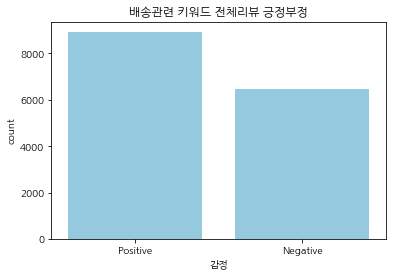

In [77]:
sns.countplot(data= reviews_S, x= "감정",color='skyblue')

plt.title("배송관련 키워드 전체리뷰 긍정부정")

plt.show()

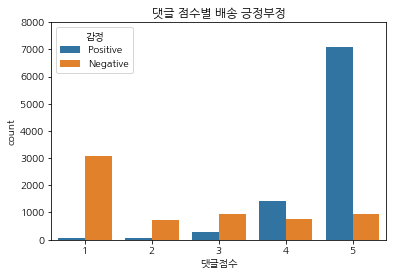

In [78]:
sns.countplot(data=reviews_S, x= "댓글점수", hue = "감정")

plt.title("댓글 점수별 배송 긍정부정")
plt.ylim(0,8000)

plt.show()

In [79]:
review_Up = reviews_S.loc[(reviews_S["댓글점수"] > 3),['댓글내용','감정',"댓글점수"]]
review_Up

,댓글내용,감정,댓글점수
0,정해진 시간 전에 잘 받았습니다,Positive,5
1,효율적인 장치 웹사이트에 기기 브랜드가 3 로 인쇄되어 있고 도착하면 다른 이름이 ...,Negative,4
2,신뢰할 수있는 판매자 제품 정시 배송,Positive,5
3,구매가 수월하게 이루어졌습니다 배송은 주어진 마감일보다 훨씬 일찍 이루어졌습니다 제...,Positive,5
5,나는 내가 기대했던 것을 정확히 받았습니다 다른 판매자의 다른 주문은 늦었지만 이번...,Positive,4
...,...,...,...
16088,제품은 원본이며 정시에 도착했으며 매우 잘 포장되어 있습니다 추천합니다,Positive,5
16089,주요 상업 축 밖에서도 훌륭한 서비스 훌륭한 가격 마감일 전에 배송됩니다,Positive,5
16090,나는 그것을 좋아했다 그것은 내 기대를 초과했습니다 양질의 제품과 빠른 배송,Positive,5
16092,아름답고 크고 훌륭하고 우수한 품질이며 항상 그렇듯이 마감일 전에 도착했습니다 적극...,Positive,5


In [80]:
review_Up.shape

(10231, 3)

In [81]:
review_Up["감정"].value_counts()

Positive    8522
Negative    1709
Name: 감정, dtype: int64

In [82]:
review_Down = reviews_S.loc[(reviews_S["댓글점수"] <= 3),['댓글내용','감정',"댓글점수"]]
review_Down

,댓글내용,감정,댓글점수
4,나는 항상 온라인으로 구매하고 합의된 기한 전에 배송이 이루어지며 이것이 최대 기한...,Negative,1
6,내 주문이 도착하지 않았습니다,Negative,1
9,기한에 맞춰 아들의 여행 일정을 잡아서 상품이 정해진 기간 내에 도착하지 않아 불편...,Negative,1
11,매우 열등한 제품 심하게 마감되었습니다,Negative,1
12,정시에 배달,Positive,3
...,...,...,...
16084,우체국이 파업 중이어서 배송이 늦어질 있나요,Negative,1
16091,배송일을 알고 싶습니다,Negative,1
16094,배송오래걸려서 아직 차에 실어보진 않았지만,Negative,3
16095,제품은 온전하고 잘 포장되어 도착했으며 내가 주문한 것입니다 기한을 못 지켜서 별 ...,Negative,3


In [83]:
review_Down.shape

(5162, 3)

In [84]:
review_Down["감정"].value_counts()

Negative    4758
Positive     404
Name: 감정, dtype: int64

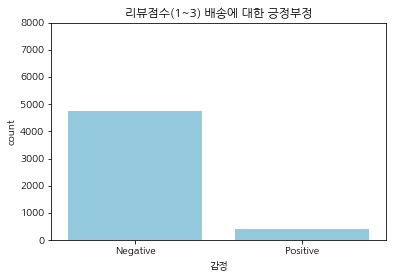

In [85]:
sns.countplot(data=review_Down, x= "감정",color='skyblue')

plt.title("리뷰점수(1~3) 배송에 대한 긍정부정")
plt.ylim(0,8000)
plt.show()

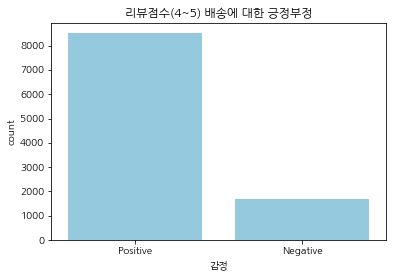

In [86]:
sns.countplot(data=review_Up, x= "감정",color='skyblue')

plt.title("리뷰점수(4~5) 배송에 대한 긍정부정")
plt.show()

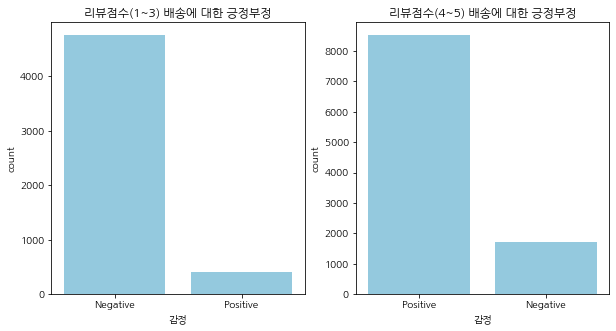

In [87]:
fig, ax = plt.subplots(ncols=2,figsize = (10,5))

sns.countplot(data=review_Down, x= "감정", ax=ax[0],color='skyblue')
sns.countplot(data=review_Up, x= "감정", ax=ax[1],color='skyblue')
ax[0].set_title("리뷰점수(1~3) 배송에 대한 긍정부정")
ax[1].set_title("리뷰점수(4~5) 배송에 대한 긍정부정");

In [88]:
from wordcloud import WordCloud

def display_word_cloud(data, width=1200, height=500):
    word_draw = WordCloud(
        # r(raw) \n 이 있을 때 경로에서 줄바꿈을 하는 문제 등이 발생하기 때문에 그 텍스트 그대로 읽어오게 합니다.
        font_path=r"/Library/Fonts/NanumBarunGothic.ttf",
        width=width, height=height,
        background_color="white",
        stopwords=['나는','추천한다','그것은','감사합니다','축하합니다','이','추천합니다','일','것','전','나','이것','바라 테','그것','노트','때문',
                   '제품','제품은','제품이','상품이','제품을','상품을'],
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

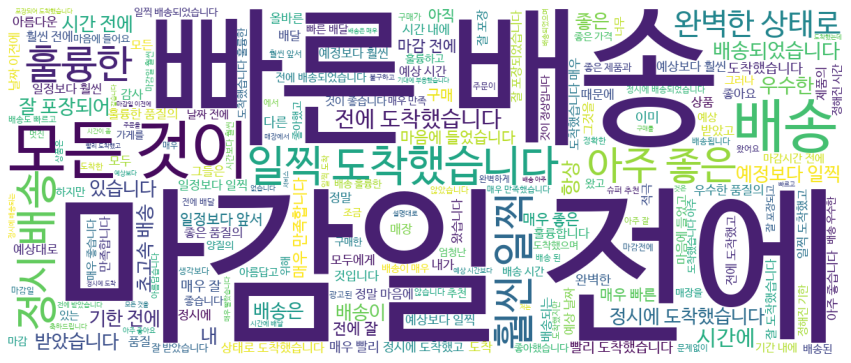

In [89]:
display_word_cloud(" ".join(review_Up["댓글내용"]))

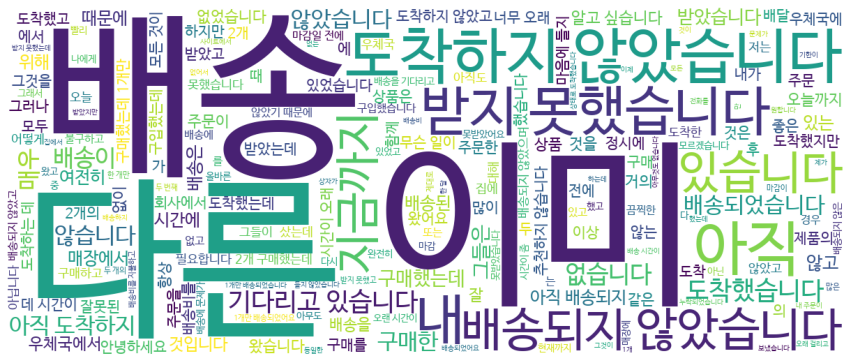

In [90]:
display_word_cloud(" ".join(review_Down["댓글내용"]))

In [91]:
review_Down[review_Down["댓글내용"].str.contains("이미")]

,댓글내용,감정,댓글점수
4,나는 항상 온라인으로 구매하고 합의된 기한 전에 배송이 이루어지며 이것이 최대 기한...,Negative,1
74,02 14일 주문건의 배송 예정일이었고 트래킹상 해당 상품이 해당 날짜에 이미 배송...,Negative,2
192,내 제품이 아직 배송되지 않았고 이미 불만을 제기했으며 지금까지는 배송을 기대하지 ...,Negative,1
228,상품이 배송되지 않았고 이미 첫 송장을 결제했는데 운임을 결제했는데 상품을 받지 못...,Negative,1
229,이미 도착한 제품에 결함이 있습니다 사용에 필요한 사항에 따라 작동하지 않았습니다 ...,Negative,1
...,...,...,...
15792,는 정확하고 시간에 보냈지 만 아마도 운송으로 인해 카트리지에 결함이 있습니다 그래...,Negative,2
15806,상품을 취소하려고 했더니 지금까지 요청이 진행중이고 상품이 이미 배송이 되었는데 이...,Negative,1
15834,구매한 2개 중 1개만 받았습니다 쓰레기 나는 최악의 품질의 가짜 인형에 대해 45...,Negative,1
15942,아직 받지 못한 상품이 배송되기를 기다리고 있습니다 기한이 지났기 때문에 이미 지불...,Negative,3
